# Preliminary exploration

## External covariates

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../../code")
from ingestion_processing.exploration import *
docs = pd.read_csv("../../data/texts.csv")
docs.head(3)

,Unnamed: 0,Participant,Sector,Country,Year,Language,Link,EconomyType,FileType,FileName,...,OCRStatus,OutputText,OutputFileName,OutputChars,NoChars,NoWords,NoSentences,EstimatedLanguage,EstimatedLanguageConfidence,ReconstructedChars
0,0,AGNI MOTORS,Electronic & Electrical Equ...,India,2019,english,https://ungc-production.s3.us-west-2.amazonaws...,Developing,pdf,0000-2019-agni-motors.pdf,...,0,® AGNI MOTORS ay AN ISO 9001 : 2008 COMPANY Ag...,../../data/txt-reports/0000-2019-agni-motors.txt,"agni motors ay an iso : company agni a no. , ...",2214,348,23,en,0.902583,iso company college trust matter tel mail info...
1,3,Addit Sp. z o.o.,General Industrials,Poland,2019,english,https://ungc-production.s3.us-west-2.amazonaws...,Developing,pdf,0003-2019-addit-sp-z-o-o.pdf,...,0,"30"" of December 2019 United Nations Global Com...",../../data/txt-reports/0003-2019-addit-sp-z-o-...,of december united nations global compact uni...,4572,685,100,en,0.935601,global concern year decide support principle g...
2,6,Akritas S.A.,Forestry & Paper,Greece,2019,english,https://ungc-production.s3.us-west-2.amazonaws...,Advanced,pdf,0006-2019-akritas-s-a.pdf,...,0,n q AKRITAS COMMUNICATION ON PROGRESS 2017 ag ...,../../data/txt-reports/0006-2019-akritas-s-a.txt,n q akritas communication on progress ag ie . ...,12900,1953,91,en,0.945219,communication progress communication progress ...


In [2]:
display(docs.shape[0])
display(docs.OutputText.isnull().sum())
docs = docs[docs.OutputText.notnull()]

2121

0

In [3]:
docs.Year.value_counts()

2020    2076
2019      43
2021       2
Name: Year, dtype: int64

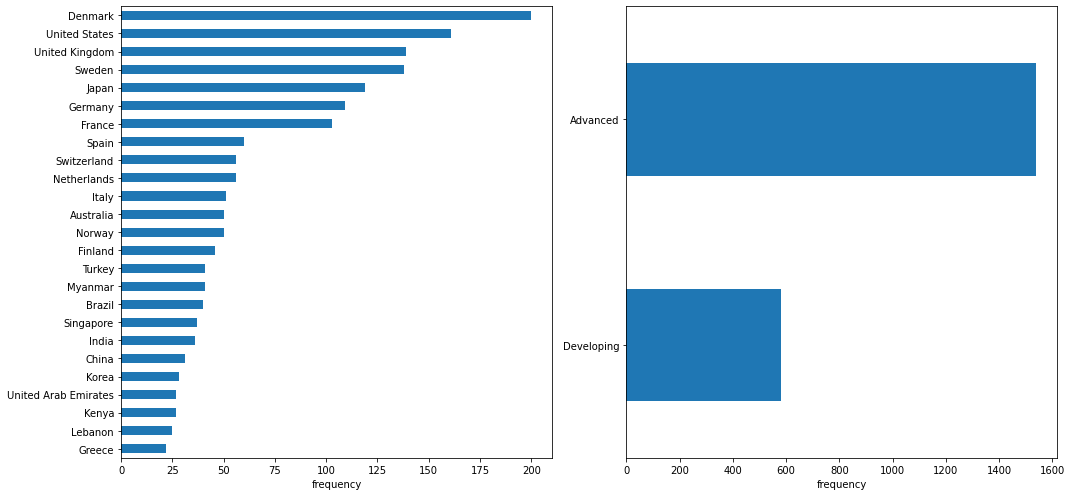

In [4]:
f, axs = plt.subplots(1,2,figsize=(15,7))
dims = ["Country", "EconomyType"]
for i,ax in enumerate(axs):
    dim = dims[i]
    docs[dim].value_counts().\
        sort_values().tail(25).plot(kind="barh", ax=ax);
    ax.set_xlabel("frequency");
f.tight_layout();    

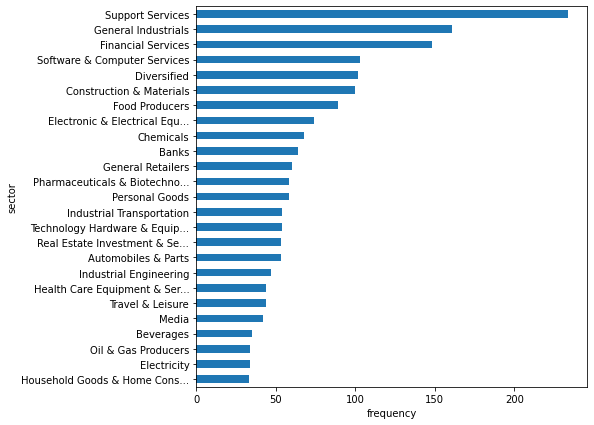

In [5]:
f, ax = plt.subplots(1,1,figsize=(7,7))
docs.groupby("Sector").Participant.count().\
    sort_values().tail(25).plot(kind="barh", ax=ax);
ax.set_ylabel("sector");
ax.set_xlabel("frequency"); 

## Texts

In [6]:
docs.NoWords.describe()

count      2121.000000
mean      13919.935408
std       19634.937550
min         153.000000
25%        2379.000000
50%        6216.000000
75%       17743.000000
max      232390.000000
Name: NoWords, dtype: float64

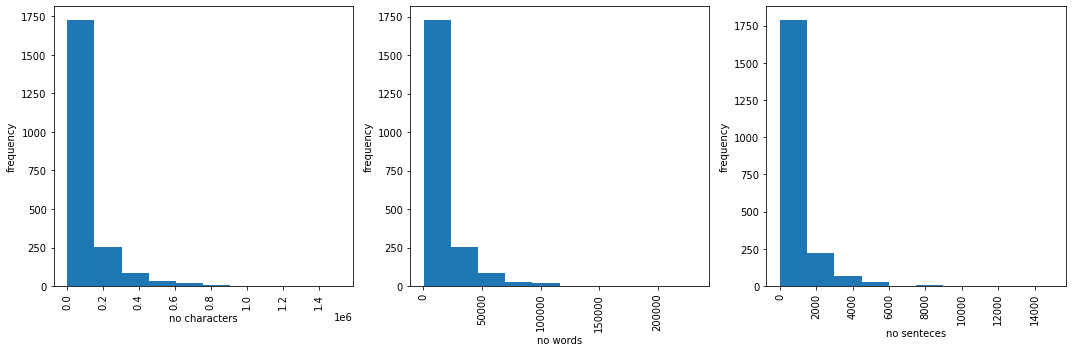

In [7]:
f, axs = plt.subplots(1,3,figsize=(15,5))
counts = {"NoChars":"no characters", "NoWords":"no words", "NoSentences":"no senteces"}
for c, ax in zip(counts.keys(), axs.flatten()):
    docs[c].plot(kind="hist", ax=ax, rot=90);
    ax.set_ylabel("frequency");
    ax.set_xlabel(counts[c]);
f.tight_layout();

## N-grams

In [8]:
adv_docs = docs[docs.EconomyType=="Advanced"]
dev_docs = docs[docs.EconomyType=="Developing"]

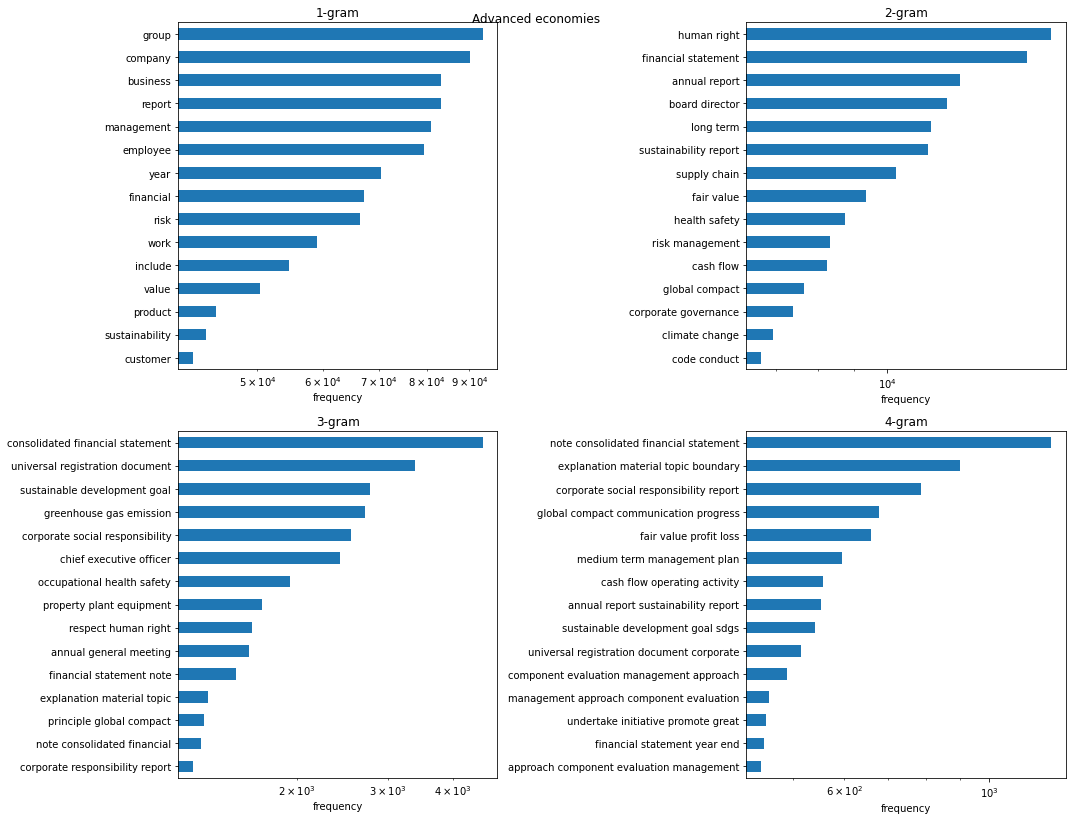

In [9]:
# advanced economies
adv_ngram_stats = get_ngram_freq(adv_docs.ReconstructedChars, (1,4), 5000)
dev_ngram_stats = get_ngram_freq(dev_docs.ReconstructedChars, (1,4), 5000)
plot_ngrams(adv_ngram_stats, "Advanced economies")

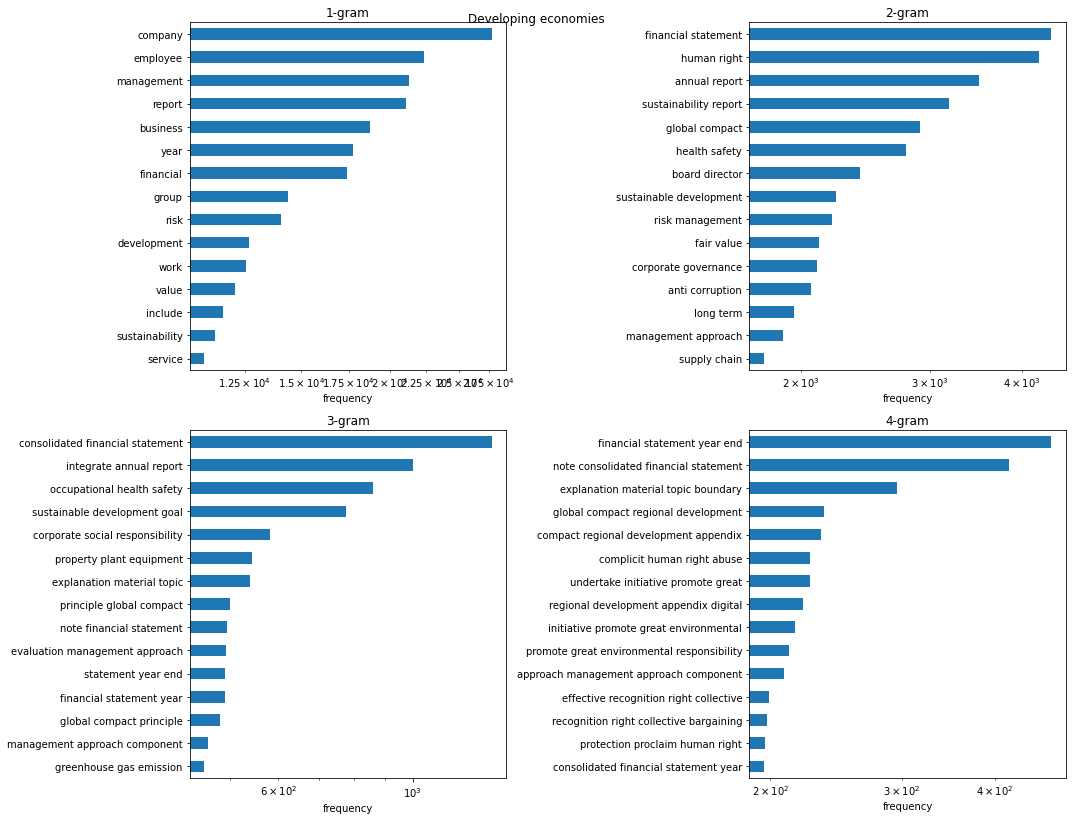

In [10]:
# developing economies
plot_ngrams(dev_ngram_stats, "Developing economies")

## Coocurence

In [11]:
adv_cooc = get_coocurence(adv_docs.ReconstructedChars)
dev_cooc = get_coocurence(dev_docs.ReconstructedChars)

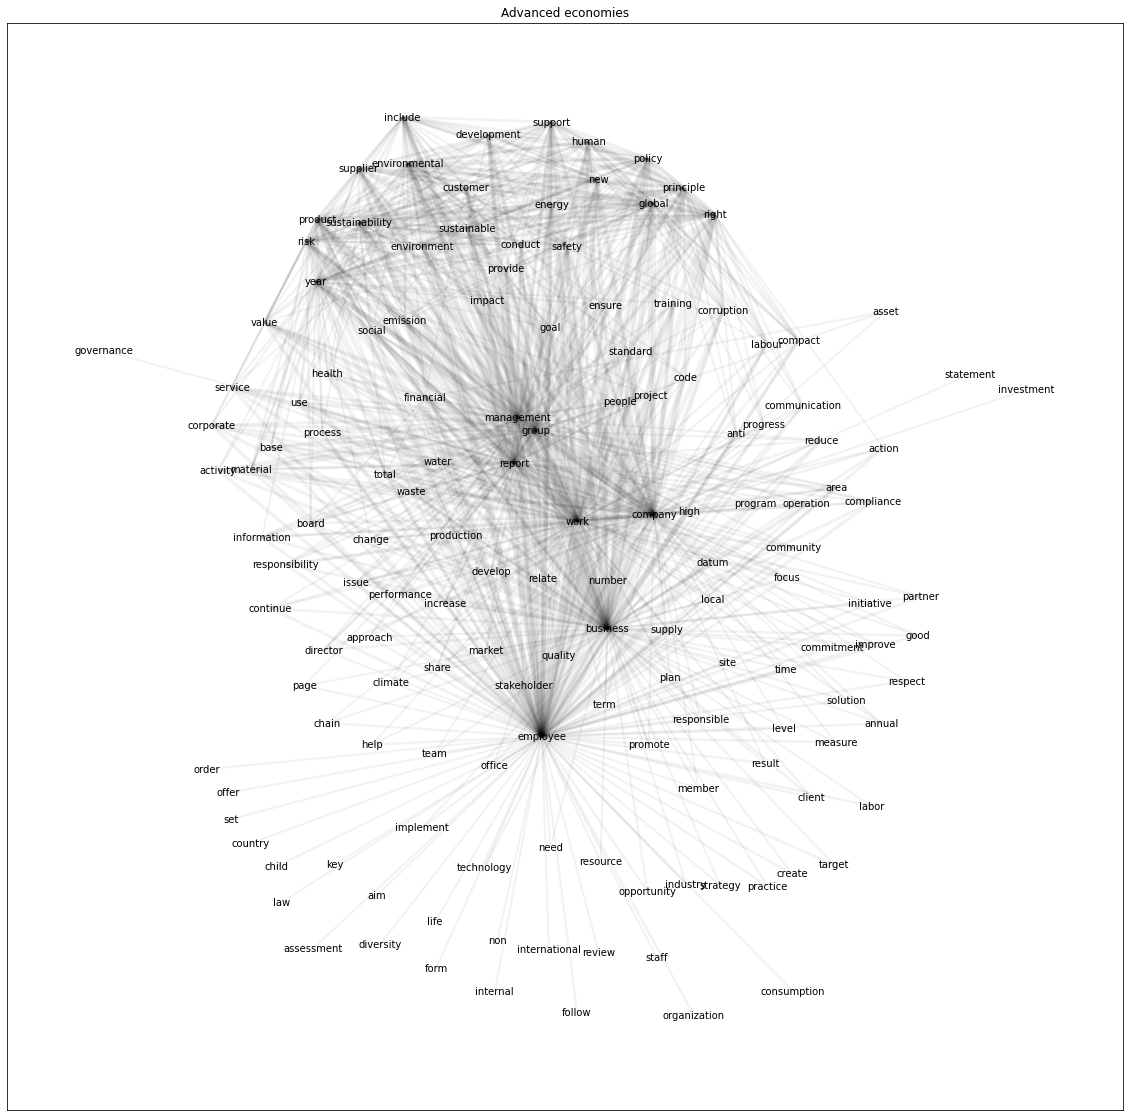

In [12]:
plot_coocurence(adv_cooc, "Advanced economies")

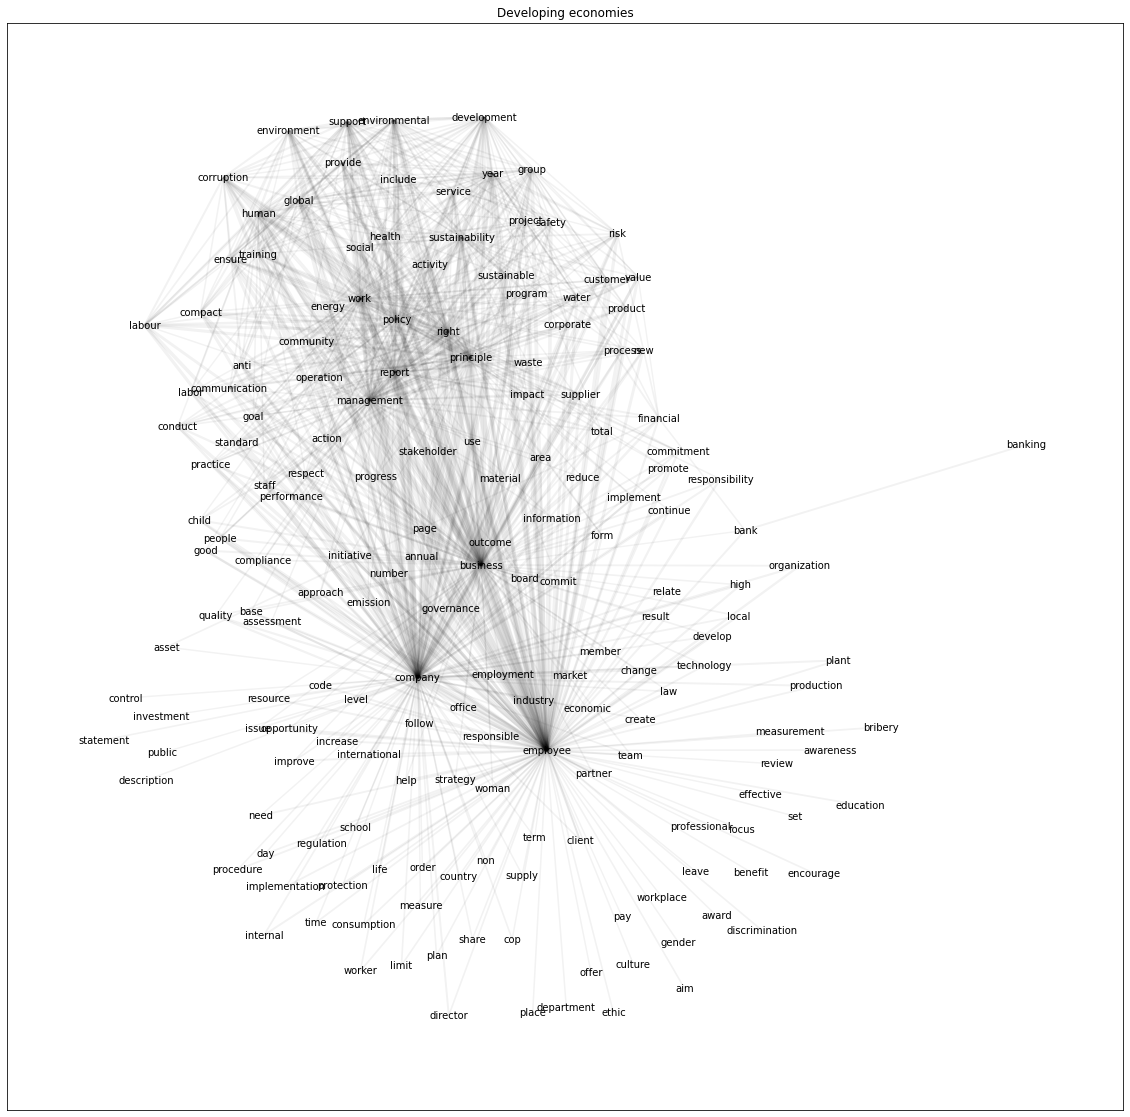

In [13]:
plot_coocurence(dev_cooc, "Developing economies")

## LDA - Topic models

In [14]:
dev_lda, dev_tfidf = get_tfidf_lda(dev_docs.ReconstructedChars)
adv_lda, adv_tfidf = get_tfidf_lda(adv_docs.ReconstructedChars)

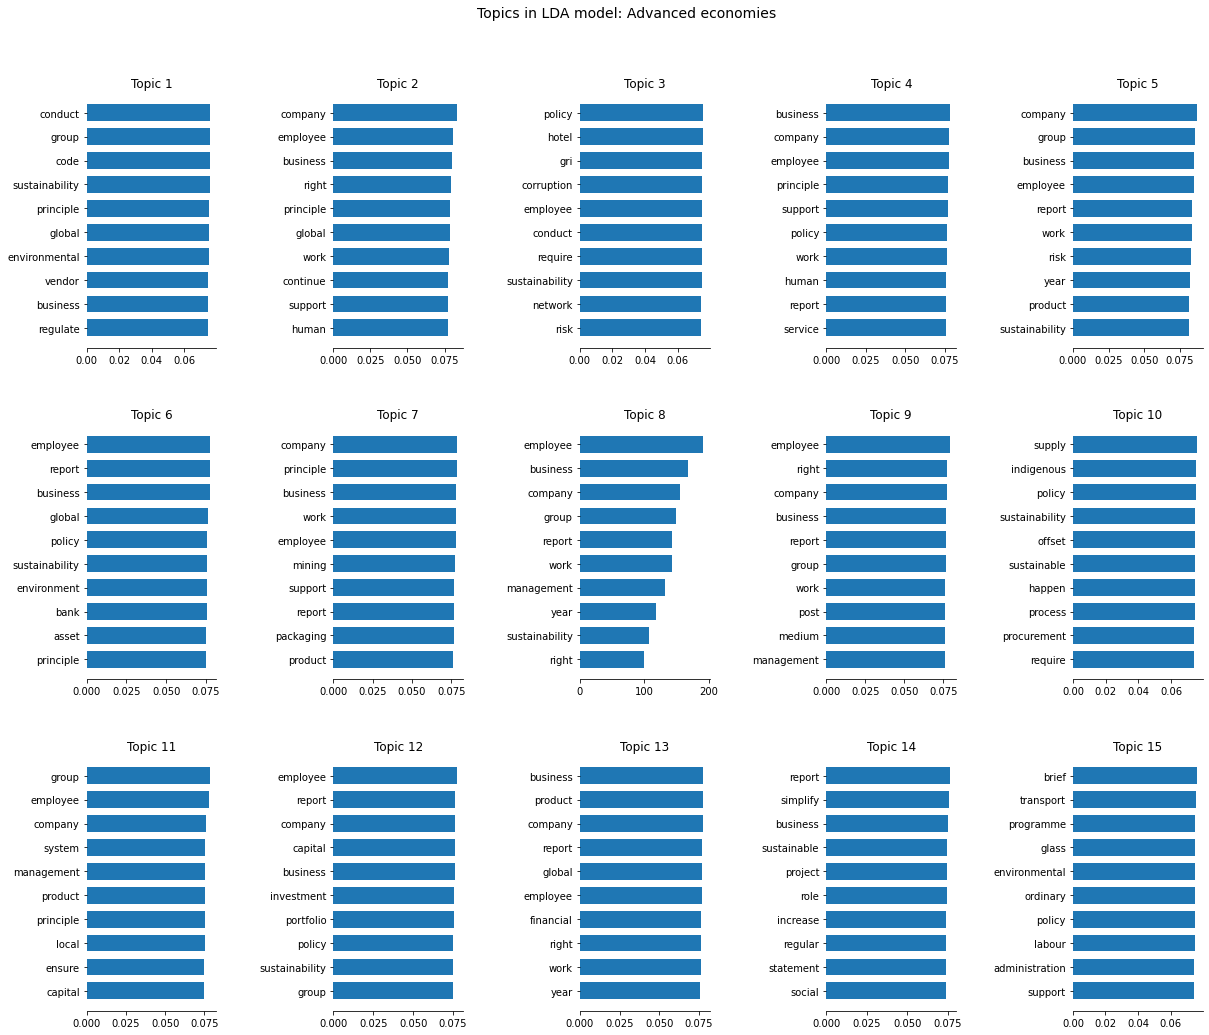

In [15]:
plot_top_words(adv_lda, adv_tfidf.get_feature_names_out(), 10, "Topics in LDA model: Advanced economies")

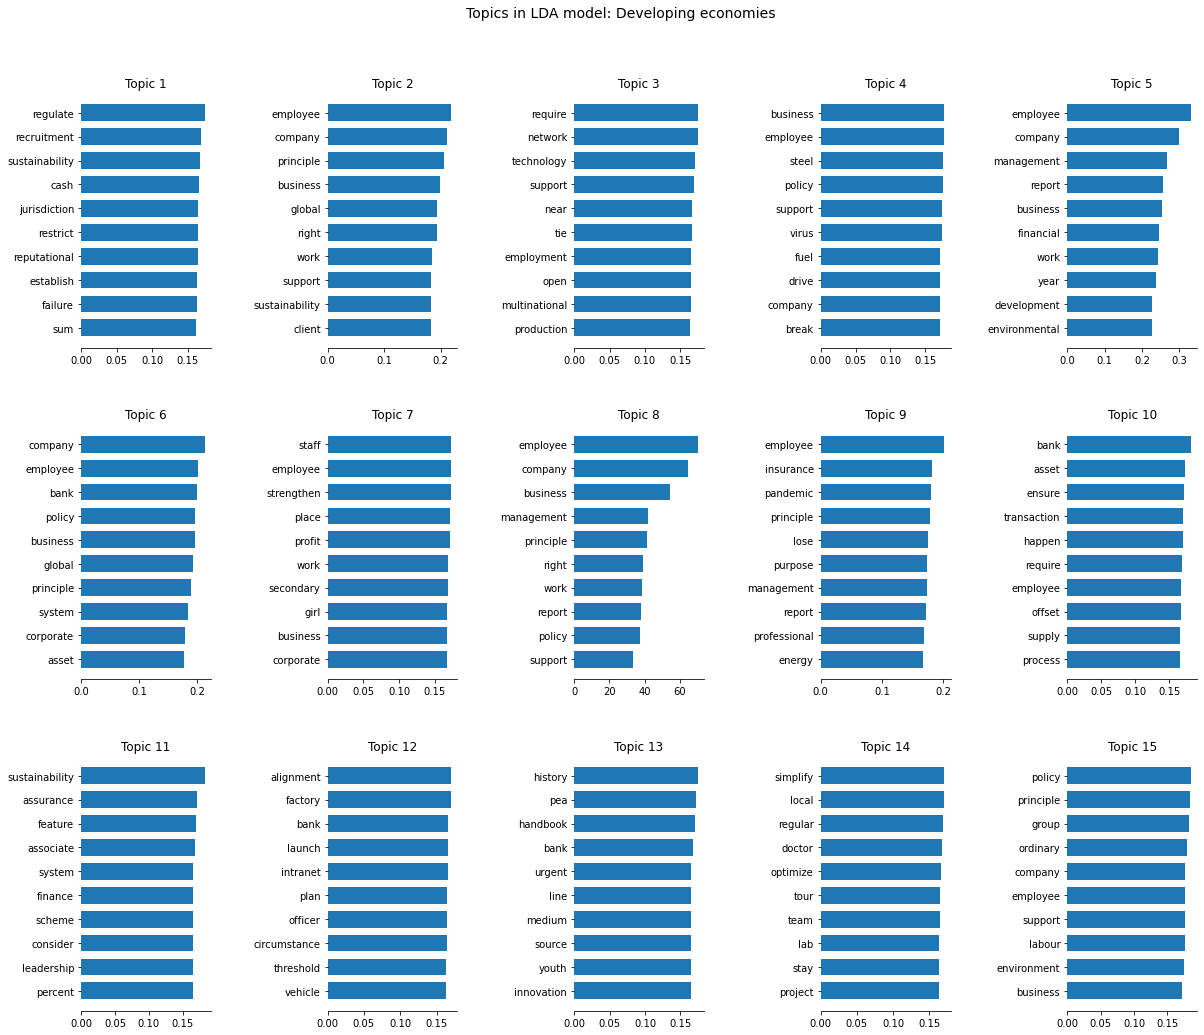

In [16]:
plot_top_words(dev_lda, dev_tfidf.get_feature_names_out(), 10, "Topics in LDA model: Developing economies")